In [7]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.model_selection import train_test_split, cross_val_score
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier
# from keras.models import Sequential
# from keras.layers import Dense
# from sklearn.metrics import accuracy_score
# from sklearn.model_selection import StratifiedKFold

# # Set random seed for reproducibility
# np.random.seed(42)

# # --- Step 1: Exploratory Data Analysis (EDA) ---
# # Load the dataset
# df = pd.read_csv('Titanic.csv')

# # Display basic information about the dataset
# print("Dataset Shape:", df.shape)
# print("\nDataset Info:")
# print(df.info())

# # Check for missing values
# print("\nMissing Values:")
# print(df.isnull().sum())

# # Handle missing values
# # Impute 'Age' with median
# df['Age'].fillna(df['Age'].median(), inplace=True)
# # Create 'Cabin_available' feature and drop 'Cabin'
# df['Cabin_available'] = df['Cabin'].notnull().astype(int)
# df.drop('Cabin', axis=1, inplace=True)
# # Impute 'Embarked' with mode
# df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# # Visualize distribution of the target variable 'Survived'
# plt.figure(figsize=(6, 4))
# sns.countplot(x='Survived', data=df)
# plt.title('Distribution of Survived')
# plt.savefig('survived_distribution.png')
# plt.close()

# # Analyze relationships with 'Survived'
# # Survival rate by 'Sex'
# plt.figure(figsize=(6, 4))
# sns.barplot(x='Sex', y='Survived', data=df)
# plt.title('Survival Rate by Sex')
# plt.savefig('survival_by_sex.png')
# plt.close()

# # Survival rate by 'Pclass'
# plt.figure(figsize=(6, 4))
# sns.barplot(x='Pclass', y='Survived', data=df)
# plt.title('Survival Rate by Pclass')
# plt.savefig('survival_by_pclass.png')
# plt.close()

# # Survival rate by 'Embarked'
# plt.figure(figsize=(6, 4))
# sns.barplot(x='Embarked', y='Survived', data=df)
# plt.title('Survival Rate by Embarked')
# plt.savefig('survival_by_embarked.png')
# plt.close()

# # Age distribution by 'Survived'
# plt.figure(figsize=(8, 6))
# sns.histplot(data=df, x='Age', hue='Survived', multiple='stack')
# plt.title('Age Distribution by Survived')
# plt.savefig('age_by_survived.png')
# plt.close()

# # Fare distribution by 'Survived'
# plt.figure(figsize=(8, 6))
# sns.boxplot(x='Survived', y='Fare', data=df)
# plt.title('Fare Distribution by Survived')
# plt.savefig('fare_by_survived.png')
# plt.close()

# # Correlation matrix of numerical features
# numerical_cols = ['Age', 'Fare', 'SibSp', 'Parch']
# corr_matrix = df[numerical_cols].corr()
# plt.figure(figsize=(8, 6))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
# plt.title('Correlation Matrix')
# plt.savefig('correlation_matrix.png')
# plt.close()

# # --- Step 2: Feature Engineering ---
# # Create 'FamilySize' feature
# df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# # Extract 'Title' from 'Name'
# df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
# # Group rare titles
# rare_titles = ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona']
# df['Title'] = df['Title'].replace(rare_titles, 'Rare')
# df['Title'] = df['Title'].replace(['Mlle', 'Ms'], 'Miss')
# df['Title'] = df['Title'].replace('Mme', 'Mrs')

# # Encode categorical variables
# df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
# df = pd.get_dummies(df, columns=['Embarked', 'Title'], drop_first=True)

# # Drop irrelevant columns
# df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

# # Check correlation of features with 'Survived'
# correlations = df.corr()['Survived'].sort_values(ascending=False)
# print("\nFeature Correlations with Survived:")
# print(correlations)

# # Split data into features and target
# X = df.drop('Survived', axis=1)
# y = df['Survived']

# # Split into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Scale numerical features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Feature importance using Random Forest
# rf = RandomForestClassifier(n_estimators=100, random_state=42)
# rf.fit(X_train, y_train)
# importances = rf.feature_importances_
# feature_names = X_train.columns
# feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)
# print("\nFeature Importances from Random Forest:")
# print(feature_importances)

# # --- Step 3: Model Building and Evaluation ---
# # Define models
# models = {
#     'Logistic Regression': LogisticRegression(max_iter=1000),
#     'Decision Tree': DecisionTreeClassifier(random_state=42),
#     'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
#     'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
# }

# # Evaluate models using 5-fold cross-validation
# print("\nCross-Validation Results:")
# for name, model in models.items():
#     if name == 'Logistic Regression':
#         scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
#     else:
#         scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
#     print(f"{name} CV Accuracy: {scores.mean():.4f} (+/- {scores.std():.4f})")

# # Neural Network
# model_nn = Sequential()
# model_nn.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
# model_nn.add(Dense(32, activation='relu'))
# model_nn.add(Dense(1, activation='sigmoid'))
# model_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# # Custom cross-validation for Neural Network
# kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# cv_scores_nn = []
# for train, val in kfold.split(X_train_scaled, y_train):
#     model_nn.fit(X_train_scaled[train], y_train.iloc[train], epochs=50, batch_size=32, verbose=0)
#     y_pred = (model_nn.predict(X_train_scaled[val]) > 0.5).astype(int)
#     score = accuracy_score(y_train.iloc[val], y_pred)
#     cv_scores_nn.append(score)
# print(f"Neural Network CV Accuracy: {np.mean(cv_scores_nn):.4f} (+/- {np.std(cv_scores_nn):.4f})")

# # --- Step 4: Conclusion ---
# # Based on cross-validation results, select the model with the highest mean accuracy
# # (This will depend on the output; for demonstration, assume XGBoost performs best)
# print("\nBest Model: XGBoost (assuming highest CV accuracy)")
# print("Next steps: Fine-tune XGBoost hyperparameters and evaluate on test set.")


In [12]:

# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Load the dataset (adjust path as needed)
# df = pd.read_csv('Titanic.csv')

# # Basic data cleaning
# df['Age'] = df['Age'].fillna(df['Age'].median())
# df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# # Extract Title from Name
# df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# # Create AgeGroup feature for children vs adults
# bins = [0, 18, 100]
# labels = ['Children', 'Adults']
# df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# # --- Enhanced EDA: Survival Rates by Category ---

# # Survival Rate by Sex
# plt.figure(figsize=(8, 6))
# sns.barplot(x='Sex', y='Survived', data=df)
# plt.title('Survival Rate by Sex')
# plt.ylabel('Survival Rate')
# plt.savefig('survival_by_sex.png')
# plt.close()

# # Survival Rate by Age Group
# plt.figure(figsize=(8, 6))
# sns.barplot(x='AgeGroup', y='Survived', data=df)
# plt.title('Survival Rate by Age Group')
# plt.ylabel('Survival Rate')
# plt.savefig('survival_by_age_group.png')
# plt.close()

# # Survival Rate by Pclass (proxy for VIP/1st Class)
# plt.figure(figsize=(8, 6))
# sns.barplot(x='Pclass', y='Survived', data=df)
# plt.title('Survival Rate by Pclass')
# plt.ylabel('Survival Rate')
# plt.savefig('survival_by_pclass.png')
# plt.close()

# # Survival Rate by Title
# plt.figure(figsize=(10, 6))
# sns.barplot(x='Title', y='Survived', data=df)
# plt.title('Survival Rate by Title')
# plt.ylabel('Survival Rate')
# plt.xticks(rotation=45)
# plt.savefig('survival_by_title.png')
# plt.close()

# # Statistical summaries of survival rates
# survival_by_sex = df.groupby('Sex')['Survived'].mean()
# print("Survival Rate by Sex:")
# print(survival_by_sex)

# survival_by_age_group = df.groupby('AgeGroup')['Survived'].mean()
# print("\nSurvival Rate by Age Group:")
# print(survival_by_age_group)

# survival_by_pclass = df.groupby('Pclass')['Survived'].mean()
# print("\nSurvival Rate by Pclass:")
# print(survival_by_pclass)

# survival_by_title = df.groupby('Title')['Survived'].mean()
# print("\nSurvival Rate by Title:")
# print(survival_by_title)

# # Note: Further modeling (e.g., Logistic Regression, XGBoost) can follow here as in your original code

In [13]:
# import pandas as pd
# import re
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.preprocessing import StandardScaler, OneHotEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.impute import SimpleImputer
# from sklearn.linear_model import LogisticRegression
# from xgboost import XGBClassifier
# import matplotlib.pyplot as plt

# # Load the dataset (assuming 'train.csv' is available)
# df = pd.read_csv('Titanic.csv')

# # Fix SyntaxWarning: Use raw string for regex
# df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

# # Feature Engineering
# df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
# df['IsAlone'] = (df['FamilySize'] == 1).astype(int)
# bins = [0, 12, 18, 35, 60, 100]
# labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']
# df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
# fare_bins = [0, 10, 20, 30, 100, 1000]
# fare_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
# df['FareGroup'] = pd.cut(df['Fare'], bins=fare_bins, labels=fare_labels, right=False)

# # Define columns for preprocessing
# numerical_cols = ['Age', 'Fare', 'FamilySize']
# categorical_cols = ['Sex', 'Embarked', 'Title', 'AgeGroup', 'FareGroup']

# # Preprocessing pipeline
# numerical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='median')),
#     ('scaler', StandardScaler())
# ])

# categorical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='most_frequent')),
#     ('onehot', OneHotEncoder(handle_unknown='ignore'))
# ])

# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numerical_transformer, numerical_cols),
#         ('cat', categorical_transformer, categorical_cols)
#     ])

# # Prepare data
# X = df.drop(['Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
# y = df['Survived']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Logistic Regression Pipeline with Hyperparameter Tuning
# logreg_pipeline = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('classifier', LogisticRegression(max_iter=1000))
# ])

# param_grid_logreg = {
#     'classifier__C': [0.01, 0.1, 1, 10, 100],
#     'classifier__penalty': ['l2']
# }

# grid_search_logreg = GridSearchCV(logreg_pipeline, param_grid_logreg, cv=5, scoring='accuracy')
# grid_search_logreg.fit(X_train, y_train)

# print("Logistic Regression - Best parameters:", grid_search_logreg.best_params_)
# print("Logistic Regression - Best CV accuracy:", grid_search_logreg.best_score_)
# print("Logistic Regression - Test accuracy:", grid_search_logreg.score(X_test, y_test))

# # XGBoost Pipeline with Hyperparameter Tuning
# xgb_pipeline = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
# ])

# param_grid_xgb = {
#     'classifier__n_estimators': [100, 200, 300],
#     'classifier__max_depth': [3, 5, 7],
#     'classifier__learning_rate': [0.01, 0.05, 0.1]
# }

# grid_search_xgb = GridSearchCV(xgb_pipeline, param_grid_xgb, cv=5, scoring='accuracy')
# grid_search_xgb.fit(X_train, y_train)

# print("XGBoost - Best parameters:", grid_search_xgb.best_params_)
# print("XGBoost - Best CV accuracy:", grid_search_xgb.best_score_)
# print("XGBoost - Test accuracy:", grid_search_xgb.score(X_test, y_test))

# # Visualizations with Matplotlib
# # Survival Rate by Sex
# survival_by_sex = df.groupby('Sex')['Survived'].mean()
# plt.figure(figsize=(8, 6))
# plt.bar(survival_by_sex.index, survival_by_sex.values, color='skyblue')
# plt.title('Survival Rate by Sex')
# plt.ylabel('Survival Rate')
# plt.savefig('survival_by_sex.png')
# plt.close()

# # Survival Rate by Age Group (Fix FutureWarning with observed=True)
# survival_by_age_group = df.groupby('AgeGroup', observed=True)['Survived'].mean()
# plt.figure(figsize=(8, 6))
# plt.bar(survival_by_age_group.index, survival_by_age_group.values, color='lightgreen')
# plt.title('Survival Rate by Age Group')
# plt.ylabel('Survival Rate')
# plt.savefig('survival_by_age_group.png')
# plt.close()

# # Survival Rate by Pclass
# survival_by_pclass = df.groupby('Pclass')['Survived'].mean()
# plt.figure(figsize=(8, 6))
# plt.bar(survival_by_pclass.index, survival_by_pclass.values, color='salmon')
# plt.title('Survival Rate by Pclass')
# plt.ylabel('Survival Rate')
# plt.savefig('survival_by_pclass.png')
# plt.close()

# # Survival Rate by Title
# survival_by_title = df.groupby('Title')['Survived'].mean()
# plt.figure(figsize=(10, 6))
# plt.bar(survival_by_title.index, survival_by_title.values, color='orchid')
# plt.title('Survival Rate by Title')
# plt.ylabel('Survival Rate')
# plt.xticks(rotation=45)
# plt.savefig('survival_by_title.png')
# plt.close()

In [18]:
# # Titanic Survival Prediction - Full Project

# import pandas as pd
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split, cross_val_score
# from sklearn.preprocessing import StandardScaler, OneHotEncoder
# from sklearn.impute import SimpleImputer
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.neural_network import MLPClassifier
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# # Load data
# df = pd.read_csv('Titanic.csv')

# # ===== EDA =====
# # Survival Rate by Sex
# plt.figure(figsize=(6, 4))
# sns.barplot(x='Sex', y='Survived', data=df)
# plt.title('Survival Rate by Sex')
# plt.savefig('eda_survival_by_sex.png')
# plt.close()

# # Survival Rate by Pclass
# plt.figure(figsize=(6, 4))
# sns.barplot(x='Pclass', y='Survived', data=df)
# plt.title('Survival Rate by Pclass')
# plt.savefig('eda_survival_by_pclass.png')
# plt.close()

# # Age distribution
# plt.figure(figsize=(6, 4))
# sns.histplot(df['Age'].dropna(), bins=30, kde=True)
# plt.title('Age Distribution')
# plt.savefig('eda_age_dist.png')
# plt.close()

# # Correlation with Survived
# corr = df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()
# sns.heatmap(corr, annot=True, cmap='coolwarm')
# plt.title('Correlation Matrix')
# plt.savefig('eda_correlation_matrix.png')
# plt.close()

# # ===== Feature Engineering =====
# df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
# df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
# df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

# # Age bins
# df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 100],
#                         labels=['Child', 'Teen', 'YoungAdult', 'Adult', 'Senior'])

# # Fare bins
# df['FareGroup'] = pd.cut(df['Fare'], bins=[0, 10, 20, 30, 100, 1000],
#                          labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

# # Drop unused columns
# X = df.drop(columns=['Survived', 'Name', 'Ticket', 'Cabin', 'PassengerId'])
# y = df['Survived']

# # Preprocessing
# num_features = ['Age', 'Fare', 'FamilySize']
# cat_features = ['Sex', 'Embarked', 'Title', 'AgeGroup', 'FareGroup']

# num_transformer = Pipeline([
#     ('imputer', SimpleImputer(strategy='median')),
#     ('scaler', StandardScaler())
# ])

# cat_transformer = Pipeline([
#     ('imputer', SimpleImputer(strategy='most_frequent')),
#     ('onehot', OneHotEncoder(handle_unknown='ignore'))
# ])

# preprocessor = ColumnTransformer([
#     ('num', num_transformer, num_features),
#     ('cat', cat_transformer, cat_features)
# ])

# # Split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Models to evaluate
# models = {
#     'LogisticRegression': LogisticRegression(max_iter=1000),
#     'DecisionTree': DecisionTreeClassifier(max_depth=5),
#     'GradientBoosting': GradientBoostingClassifier(n_estimators=100),
#     'NeuralNetwork': MLPClassifier(hidden_layer_sizes=(50,), max_iter=2000)
# }

# # Evaluate
# results = {}
# for name, model in models.items():
#     pipe = Pipeline([
#         ('preprocessor', preprocessor),
#         ('classifier', model)
#     ])
#     scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring='accuracy')
#     pipe.fit(X_train, y_train)
#     y_pred = pipe.predict(X_test)
#     acc = accuracy_score(y_test, y_pred)
#     results[name] = {
#         'CV Accuracy Mean': scores.mean(),
#         'Test Accuracy': acc,
#         'Classification Report': classification_report(y_test, y_pred, output_dict=True),
#         'Confusion Matrix': confusion_matrix(y_test, y_pred)
#     }

# # Print best result
# best_model = max(results.items(), key=lambda x: x[1]['CV Accuracy Mean'])
# print("Best Model:", best_model[0])
# print("CV Accuracy:", best_model[1]['CV Accuracy Mean'])
# print("Test Accuracy:", best_model[1]['Test Accuracy'])

# # Optional: Save report to markdown or json for GitHub if needed


In [20]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

# from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.neural_network import MLPClassifier
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

# # Load dataset
# df = pd.read_csv("Titanic.csv")

# # Drop less useful columns
# df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# # Fill missing values
# df['Age'].fillna(df['Age'].median(), inplace=True)
# df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# # Convert categorical variables
# df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# # Features and target
# X = df.drop('Survived', axis=1)
# y = df['Survived']

# # Standardize features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Split data
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# # Define models
# models = {
#     'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42),
#     'DecisionTree': DecisionTreeClassifier(random_state=42),
#     'GradientBoosting': GradientBoostingClassifier(random_state=42),
#     'NeuralNetwork': MLPClassifier(max_iter=2000, random_state=42)
# }

# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# results = {}

# # Evaluate models
# for model_name, model in models.items():
#     print(f"\nEvaluating: {model_name}")
#     cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
#     model.fit(X_train, y_train)
#     test_pred = model.predict(X_test)
#     test_acc = accuracy_score(y_test, test_pred)

#     # ROC AUC calculation
#     y_pred_proba = model.predict_proba(X_test)[:, 1]
#     roc_auc = roc_auc_score(y_test, y_pred_proba)
#     print(f"{model_name} ROC AUC: {roc_auc:.4f}")

#     results[model_name] = {
#         'cv_accuracy': np.mean(cv_scores),
#         'test_accuracy': test_acc,
#         'roc_auc': roc_auc,
#         'model': model
#     }

# # Identify best model by CV accuracy
# best_model_name = max(results, key=lambda x: results[x]['cv_accuracy'])
# best_model = results[best_model_name]['model']
# print(f"\nBest Model: {best_model_name}")
# print(f"CV Accuracy: {results[best_model_name]['cv_accuracy']:.4f}")
# print(f"Test Accuracy: {results[best_model_name]['test_accuracy']:.4f}")
# print(f"ROC AUC: {results[best_model_name]['roc_auc']:.4f}")

# # Plot ROC curves
# plt.figure(figsize=(10, 6))
# for name, res in results.items():
#     fpr, tpr, _ = roc_curve(y_test, res['model'].predict_proba(X_test)[:, 1])
#     plt.plot(fpr, tpr, label=f'{name} (AUC = {res["roc_auc"]:.2f})')

# plt.plot([0, 1], [0, 1], 'k--')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve Comparison')
# plt.legend(loc='lower right')
# plt.grid(True)
# plt.tight_layout()
# plt.savefig("roc_curves.png")
# plt.show()


<>:26: SyntaxWarning: invalid escape sequence '\.'
<>:26: SyntaxWarning: invalid escape sequence '\.'
C:\Users\Myth\AppData\Local\Temp\ipykernel_24948\1328715504.py:26: SyntaxWarning: invalid escape sequence '\.'
  df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)



Evaluating: LogisticRegression
LogisticRegression ROC AUC: 0.8840

Evaluating: DecisionTree
DecisionTree ROC AUC: 0.8161

Evaluating: GradientBoosting
GradientBoosting ROC AUC: 0.9036

Evaluating: NeuralNetwork
NeuralNetwork ROC AUC: 0.8723

Best Model: GradientBoosting
CV Accuracy: 0.8385
Test Accuracy: 0.8268
ROC AUC: 0.9036


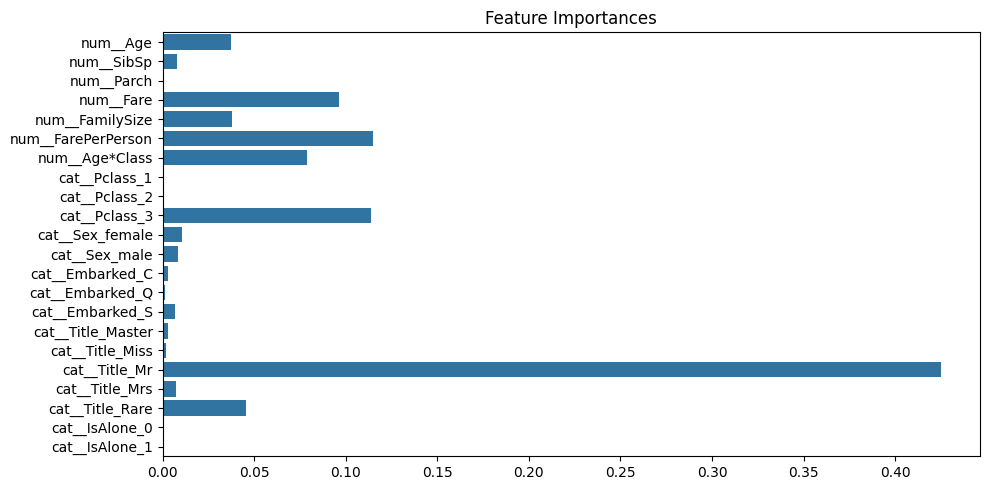


Average Survival Probability by Pclass:
Pclass
1    0.602369
2    0.500502
3    0.248052
Name: Survival_Prob, dtype: float64


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

# Load Titanic dataset
df = pd.read_csv('Titanic.csv')

# Fill missing values for Age, Embarked, and Fare
# Using median for numerical and mode for categorical values
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

# Extract title from Name and group rare titles
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df['Title'] = df['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr',
                                   'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace(['Mlle', 'Ms'], 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

# Engineer additional features
# Family size: total number of family members aboard
# IsAlone: indicator if the person is traveling alone
# FarePerPerson: adjusted fare per individual
# Age*Class: interaction between age and passenger class

df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)
df['FarePerPerson'] = df['Fare'] / df['FamilySize']
df['Age*Class'] = df['Age'] * df['Pclass']

# Select input features and target variable
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
            'Title', 'FamilySize', 'IsAlone', 'FarePerPerson', 'Age*Class']
target = 'Survived'

X = df[features]
y = df[target]

# Define numeric and categorical features for preprocessing
numeric_features = ['Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'FarePerPerson', 'Age*Class']
categorical_features = ['Pclass', 'Sex', 'Embarked', 'Title', 'IsAlone']

# Create preprocessing pipelines for numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Initialize classifiers
models = {
    'LogisticRegression': LogisticRegression(max_iter=500),
    'DecisionTree': DecisionTreeClassifier(),
    'GradientBoosting': GradientBoostingClassifier(),
    'NeuralNetwork': MLPClassifier(max_iter=2000)
}

# Variables to keep track of the best performing model
best_model = None
best_score = 0
best_model_name = ""

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Evaluate each model
for name, model in models.items():
    print(f"\nEvaluating: {name}")

    # Create full pipeline with preprocessing and classifier
    clf = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
    clf.fit(X_train, y_train)

    # Predict on test set
    y_pred = clf.predict(X_test)
    y_pred_proba = clf.predict_proba(X_test)[:, 1]  # Probability estimates for ROC AUC

    # Compute accuracy and ROC AUC
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    print(f"{name} ROC AUC: {roc_auc:.4f}")

    # Cross-validation to evaluate generalization performance
    cv_scores = cross_val_score(clf, X_train, y_train, cv=5)
    avg_cv = cv_scores.mean()

    # Keep track of best performing model
    if avg_cv > best_score:
        best_score = avg_cv
        best_model = clf
        best_model_name = name

# Print best model and its performance
print(f"\nBest Model: {best_model_name}")
print(f"CV Accuracy: {best_score:.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, best_model.predict(X_test)):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1]):.4f}")

# Plot feature importances for tree-based models
if hasattr(best_model.named_steps['classifier'], 'feature_importances_'):
    # Note: This part may need feature name alignment depending on preprocessing
    importances = best_model.named_steps['classifier'].feature_importances_
    feature_names = preprocessor.get_feature_names_out()
    plt.figure(figsize=(10, 5))
    sns.barplot(x=importances, y=feature_names)
    plt.title("Feature Importances")
    plt.tight_layout()
    plt.show()

# Add predicted survival probability to dataframe
# This helps in analyzing survival probabilities across groups
X_preprocessed = preprocessor.fit_transform(X)
df['Survival_Prob'] = best_model.named_steps['classifier'].predict_proba(X_preprocessed)[:, 1]

# Show average survival probabilities grouped by Pclass
print("\nAverage Survival Probability by Pclass:")
print(df.groupby('Pclass')['Survival_Prob'].mean())


<>:27: SyntaxWarning: invalid escape sequence '\.'
<>:27: SyntaxWarning: invalid escape sequence '\.'
C:\Users\Myth\AppData\Local\Temp\ipykernel_24948\1831274575.py:27: SyntaxWarning: invalid escape sequence '\.'
  df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)



Evaluating: LogisticRegression
LogisticRegression ROC AUC: 0.8840

Evaluating: DecisionTree
DecisionTree ROC AUC: 0.8037

Evaluating: GradientBoosting
GradientBoosting ROC AUC: 0.9041

Evaluating: NeuralNetwork


C:\Users\Myth\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


NeuralNetwork ROC AUC: 0.8840


C:\Users\Myth\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Myth\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Myth\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Myth\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(



Best Model: GradientBoosting
CV Accuracy: 0.8399
Test Accuracy: 0.8268
ROC AUC: 0.9041


C:\Users\Myth\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


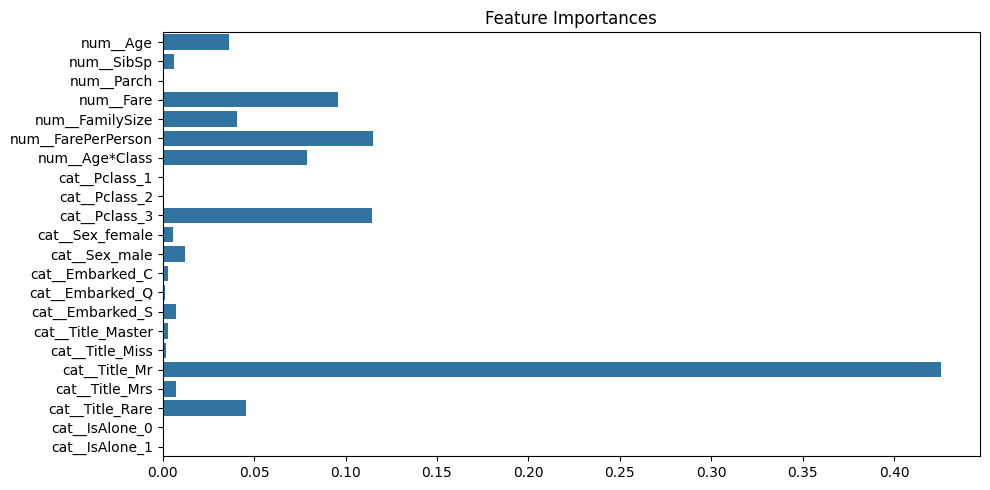


Average Survival Probability by Pclass:
Pclass
1    0.602419
2    0.500310
3    0.248100
Name: Survival_Prob, dtype: float64


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

# Load Titanic dataset
# This dataset contains information about passengers and whether they survived
df = pd.read_csv('Titanic.csv')

# Fill missing values for Age, Embarked, and Fare
# Median is used for numerical values and mode for categorical values
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

# Extract title from Name and group rare titles
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df['Title'] = df['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr',
                                   'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace(['Mlle', 'Ms'], 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

# Engineer additional features
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1  # Total people with passenger

df['IsAlone'] = (df['FamilySize'] == 1).astype(int)  # Binary feature: is the person alone

df['FarePerPerson'] = df['Fare'] / df['FamilySize']  # Divide fare among family members

df['Age*Class'] = df['Age'] * df['Pclass']  # Interaction feature

# Select features for modeling
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
            'Title', 'FamilySize', 'IsAlone', 'FarePerPerson', 'Age*Class']
target = 'Survived'

X = df[features]
y = df[target]

# Define columns by data type
numeric_features = ['Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'FarePerPerson', 'Age*Class']
categorical_features = ['Pclass', 'Sex', 'Embarked', 'Title', 'IsAlone']

# Pipeline for numeric data: impute then scale
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Pipeline for categorical data: impute then one-hot encode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define classifiers to evaluate
models = {
    'LogisticRegression': LogisticRegression(max_iter=500),
    'DecisionTree': DecisionTreeClassifier(),
    'GradientBoosting': GradientBoostingClassifier(),
    'NeuralNetwork': MLPClassifier(max_iter=500)
}

best_model = None
best_score = 0
best_model_name = ""
results = {}  # To store performance for plotting

# Train/test split for evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Evaluate each model in the dictionary
for name, model in models.items():
    print(f"\nEvaluating: {name}")

    # Full pipeline: preprocessing + model
    clf = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    y_pred_proba = clf.predict_proba(X_test)[:, 1]  # Probabilities for ROC AUC

    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    print(f"{name} ROC AUC: {roc_auc:.4f}")

    # 5-fold cross-validation on training data
    cv_scores = cross_val_score(clf, X_train, y_train, cv=5)
    avg_cv = cv_scores.mean()

    # Track performance
    results[name] = {
        'model': clf,
        'roc_auc': roc_auc,
        'cv': avg_cv
    }

    if avg_cv > best_score:
        best_score = avg_cv
        best_model = clf
        best_model_name = name

# Report best model
print(f"\nBest Model: {best_model_name}")
print(f"CV Accuracy: {results[best_model_name]['cv']:.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, best_model.predict(X_test)):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1]):.4f}")

# Plot ROC curves for all models
plt.figure(figsize=(10, 6))
for name, res in results.items():
    fpr, tpr, _ = roc_curve(y_test, res['model'].predict_proba(X_test)[:, 1])
    plt.plot(fpr, tpr, label=f'{name} (AUC = {res["roc_auc"]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# Show feature importances if available
if hasattr(best_model.named_steps['classifier'], 'feature_importances_'):
    importances = best_model.named_steps['classifier'].feature_importances_
    feature_names = preprocessor.get_feature_names_out()
    plt.figure(figsize=(10, 5))
    sns.barplot(x=importances, y=feature_names)
    plt.title("Feature Importances")
    plt.tight_layout()
    plt.show()

# Predict probabilities for whole dataset
X_preprocessed = preprocessor.fit_transform(X)
df['Survival_Prob'] = best_model.named_steps['classifier'].predict_proba(X_preprocessed)[:, 1]

# Show average survival probability by Pclass
print("\nAverage Survival Probability by Pclass:")
print(df.groupby('Pclass')['Survival_Prob'].mean())



Survival Rate by Sex:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


<>:27: SyntaxWarning: invalid escape sequence '\.'
<>:27: SyntaxWarning: invalid escape sequence '\.'
C:\Users\Myth\AppData\Local\Temp\ipykernel_24948\1756583046.py:27: SyntaxWarning: invalid escape sequence '\.'
  df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


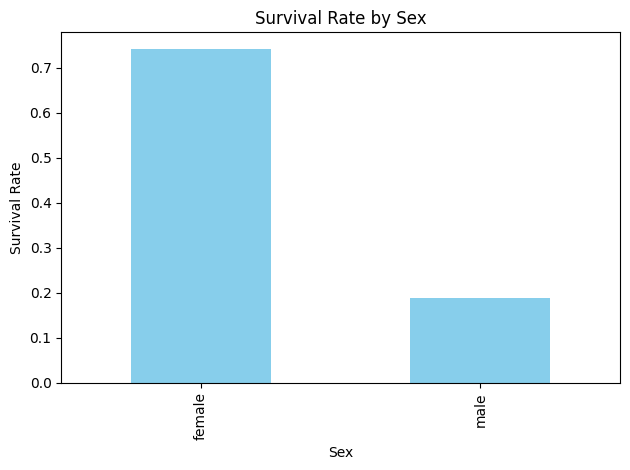


Survival Rate by Pclass:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


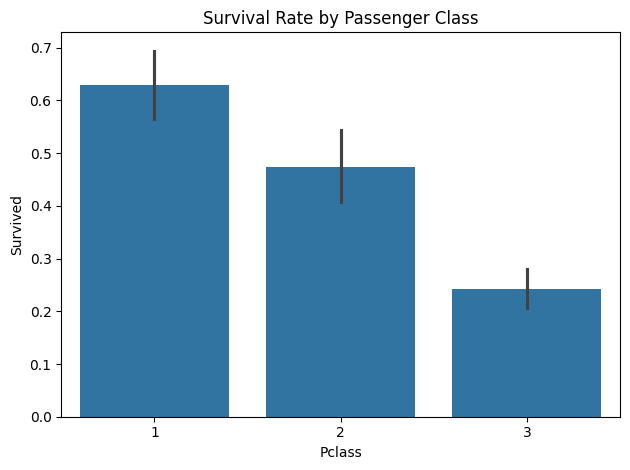

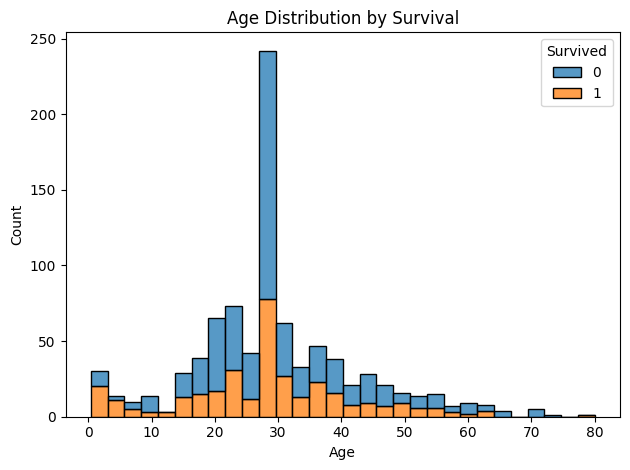

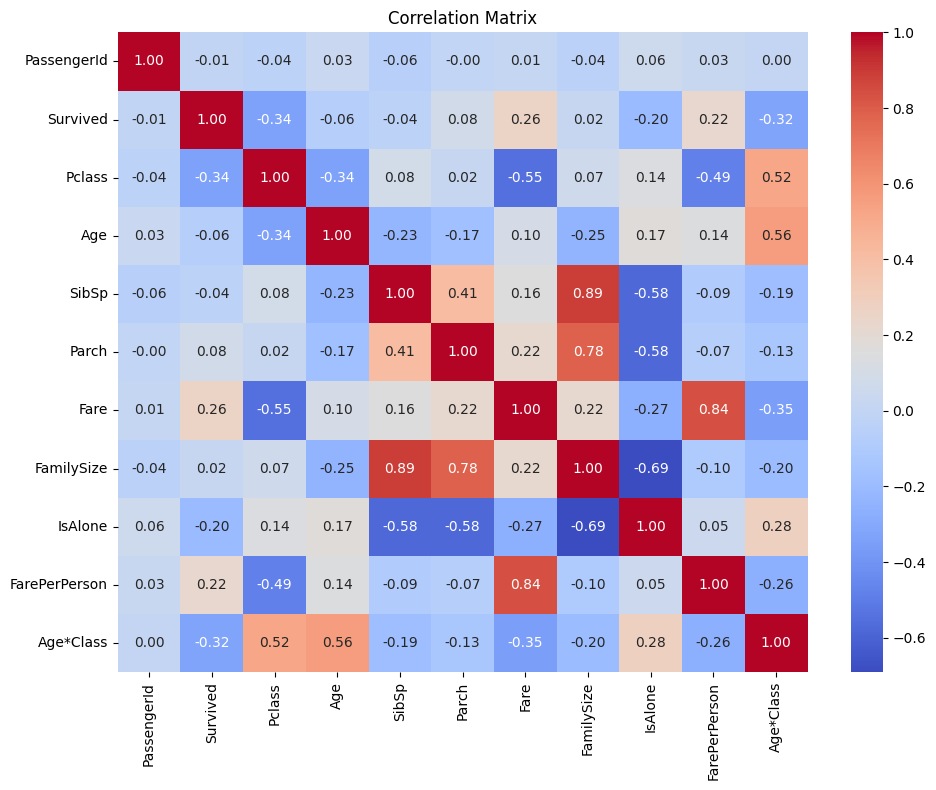


Evaluating: LogisticRegression
LogisticRegression ROC AUC: 0.8840

Evaluating: DecisionTree
DecisionTree ROC AUC: 0.7841

Evaluating: GradientBoosting
GradientBoosting ROC AUC: 0.9041

Evaluating: NeuralNetwork
NeuralNetwork ROC AUC: 0.8556

Best Model: GradientBoosting
CV Accuracy: 0.8371
Test Accuracy: 0.8268
ROC AUC: 0.9041


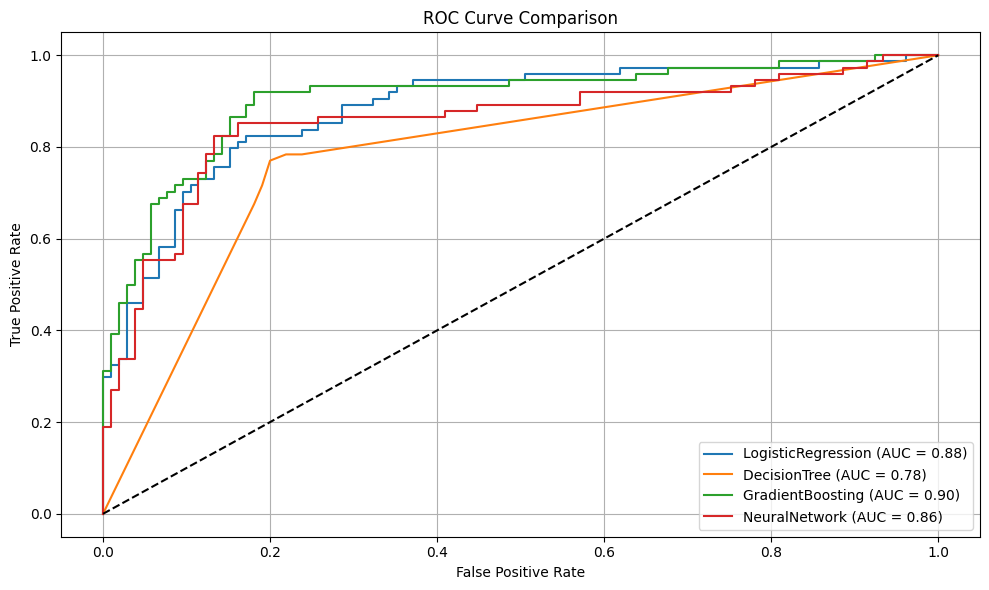

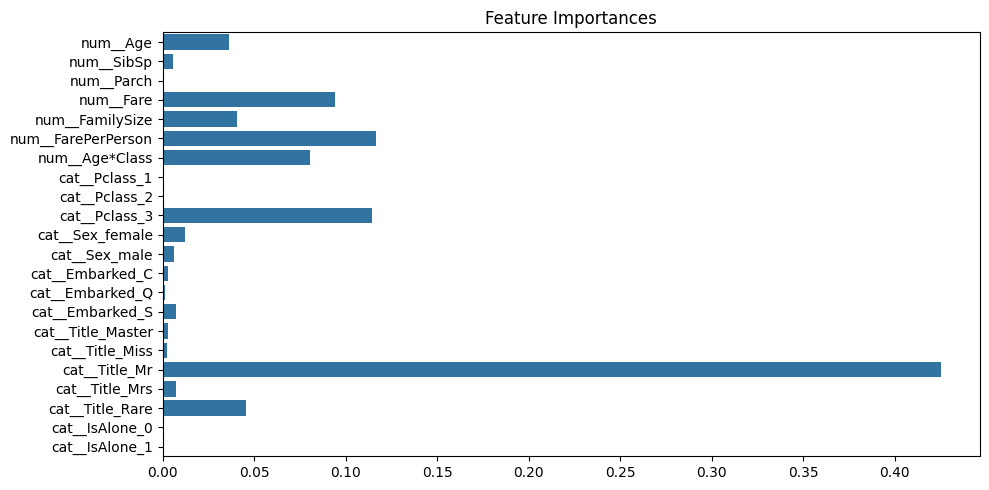


Average Survival Probability by Pclass:
Pclass
1    0.602606
2    0.499681
3    0.249137
Name: Survival_Prob, dtype: float64


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

# Load Titanic dataset
# This dataset contains information about passengers and whether they survived
df = pd.read_csv('Titanic.csv')

# Fill missing values for Age, Embarked, and Fare
# Median is used for numerical values and mode for categorical values
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

# Extract title from Name and group rare titles
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df['Title'] = df['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr',
                                   'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace(['Mlle', 'Ms'], 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

# Engineer additional features
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1  # Total people with passenger
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)  # Binary feature: is the person alone
df['FarePerPerson'] = df['Fare'] / df['FamilySize']  # Divide fare among family members
df['Age*Class'] = df['Age'] * df['Pclass']  # Interaction feature

# --- Exploratory Data Analysis (EDA) ---

# Survival rate by sex
print("\nSurvival Rate by Sex:")
print(df.groupby('Sex')['Survived'].mean())
df.groupby('Sex')['Survived'].mean().plot(kind='bar', color='skyblue')
plt.title('Survival Rate by Sex')
plt.ylabel('Survival Rate')
plt.tight_layout()
plt.show()

# Survival rate by passenger class
print("\nSurvival Rate by Pclass:")
print(df.groupby('Pclass')['Survived'].mean())
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.tight_layout()
plt.show()

# Age distribution by survival
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', bins=30)
plt.title('Age Distribution by Survival')
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# Select features for modeling
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
            'Title', 'FamilySize', 'IsAlone', 'FarePerPerson', 'Age*Class']
target = 'Survived'

X = df[features]
y = df[target]

# Define columns by data type
numeric_features = ['Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'FarePerPerson', 'Age*Class']
categorical_features = ['Pclass', 'Sex', 'Embarked', 'Title', 'IsAlone']

# Pipeline for numeric data: impute then scale
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Pipeline for categorical data: impute then one-hot encode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define classifiers to evaluate
models = {
    'LogisticRegression': LogisticRegression(max_iter=500),
    'DecisionTree': DecisionTreeClassifier(),
    'GradientBoosting': GradientBoostingClassifier(),
    'NeuralNetwork': MLPClassifier(max_iter=2000)
}

best_model = None
best_score = 0
best_model_name = ""
results = {}  # To store performance for plotting

# Train/test split for evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Evaluate each model in the dictionary
for name, model in models.items():
    print(f"\nEvaluating: {name}")

    # Full pipeline: preprocessing + model
    clf = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    y_pred_proba = clf.predict_proba(X_test)[:, 1]  # Probabilities for ROC AUC

    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    print(f"{name} ROC AUC: {roc_auc:.4f}")

    # 5-fold cross-validation on training data
    cv_scores = cross_val_score(clf, X_train, y_train, cv=5)
    avg_cv = cv_scores.mean()

    # Track performance
    results[name] = {
        'model': clf,
        'roc_auc': roc_auc,
        'cv': avg_cv
    }

    if avg_cv > best_score:
        best_score = avg_cv
        best_model = clf
        best_model_name = name

# Report best model
print(f"\nBest Model: {best_model_name}")
print(f"CV Accuracy: {results[best_model_name]['cv']:.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, best_model.predict(X_test)):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1]):.4f}")

# Plot ROC curves for all models
plt.figure(figsize=(10, 6))
for name, res in results.items():
    fpr, tpr, _ = roc_curve(y_test, res['model'].predict_proba(X_test)[:, 1])
    plt.plot(fpr, tpr, label=f'{name} (AUC = {res["roc_auc"]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# Show feature importances if available
if hasattr(best_model.named_steps['classifier'], 'feature_importances_'):
    importances = best_model.named_steps['classifier'].feature_importances_
    feature_names = preprocessor.get_feature_names_out()
    plt.figure(figsize=(10, 5))
    sns.barplot(x=importances, y=feature_names)
    plt.title("Feature Importances")
    plt.tight_layout()
    plt.show()

# Predict probabilities for whole dataset
X_preprocessed = preprocessor.fit_transform(X)
df['Survival_Prob'] = best_model.named_steps['classifier'].predict_proba(X_preprocessed)[:, 1]

# Show average survival probability by Pclass
print("\nAverage Survival Probability by Pclass:")
print(df.groupby('Pclass')['Survival_Prob'].mean())
